In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [32]:
subject_dict= {'A': 'Manuals', 'B': 'Italian Art', 'C': 'Italian Artists', 'D': 'Rome','E':'Italian Topography', 'F': 'Italian Topography', 'G': 'Sources', 'H': 'Iconography', 
               'J': 'Ornament','K': 'Kat and K', 'L': 'Congress Publications', 'M': 'Art in General', 'N': 'Architecture', 'O':'Sculpture', 'P': 'Painting', 'Q': 'Manuscript Illumination', 'R': 'Graphic Arts', 
               'S': 'Applied Arts', 'T': 'Collecting Art etc.', 'U': 'Registers of Artistic Monuments', 'V': 'Cultural Institutions', 'W': 'Non-Italian Artists','X': 'European Topography', 'Y': 'World Topography', 'Z': 'Related Disciplines', ' ': 'None'}

# Currently readable signatures

In [16]:
df = pd.read_csv('data/csv/freihand_signatures.csv')

In [48]:
df.isna().sum()

bvb                    0
title                  0
signature              0
inventory_nr       81897
inventory_date         0
inventory_year     83165
lang               67496
year                   0
sys                    0
text                   0
text_1                 0
text_2                40
text_3            111628
Level1                 0
dtype: int64

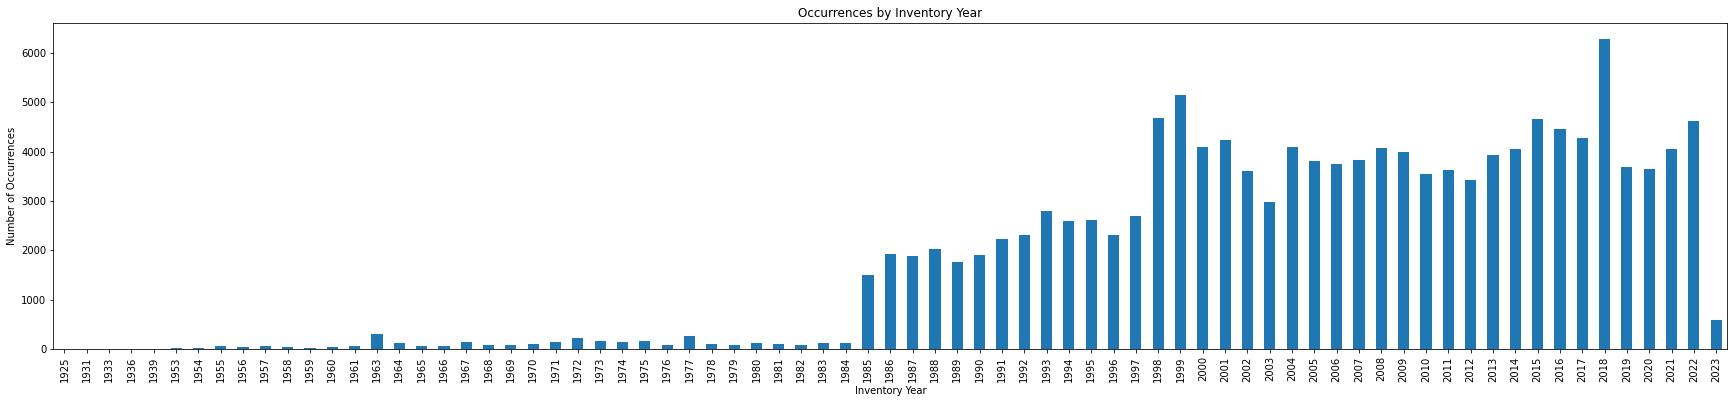

In [17]:
# Group the DataFrame by inventory year and count the occurrences


year_counts = df.groupby('inventory_year').size()

# Plot the year_counts as a bar plot

# Convert the index of the year_counts to integer type
year_counts.index = year_counts.index.astype(int)

year_counts.plot(kind='bar', figsize=(30, 6))
plt.xlabel('Inventory Year')

plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year')
plt.show()

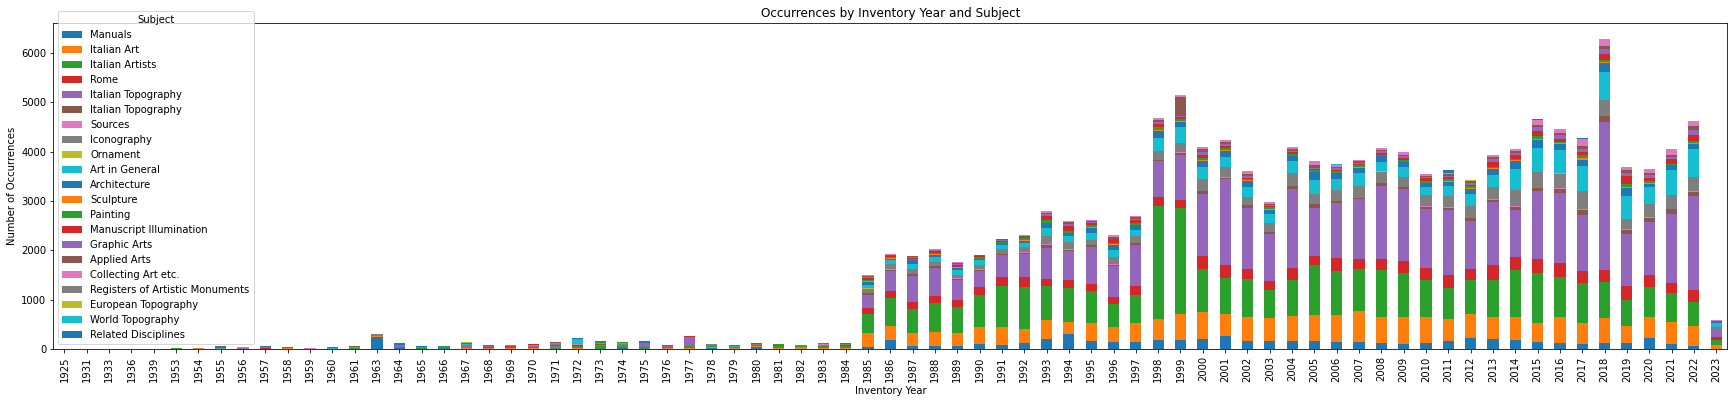

In [18]:

# Group the DataFrame by inventory year and category and count the occurrences
df['Level1'] = df.signature.str[0]
year_counts = df.groupby(['inventory_year', 'Level1']).size().unstack()

# Plot the year_counts as a bar plot
ax = year_counts.plot(kind='bar', stacked=True, figsize=(30, 6))
plt.xlabel('Inventory Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year and Subject')
plt.legend(title='Subject')

# Set the legend labels using the category_dict
handles, labels = ax.get_legend_handles_labels()
new_labels = [subject_dict[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Subject')

# Set the x-tick labels to be integers
ax.set_xticklabels(year_counts.index.astype(int))

plt.show()

# Freihand

In [5]:
# Books available in the library

df_freihand = pd.read_csv('data/Freihand.csv', sep=';',  error_bad_lines=False, header=0, 
                          names = ['bvb', 'title', 'year', 'signature', 'collection', 'inventory_nr', 'inventory_date'])

C:\Users\hanna\AppData\Local\Temp/ipykernel_13476/3202955160.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_freihand = pd.read_csv('data/Freihand.csv', sep=';',  error_bad_lines=False, header=0,


In [50]:
df_freihand.isna().sum()

bvb                    0
title                  2
year                   0
signature           1095
collection             0
inventory_nr      120968
inventory_date         0
inventory_year    122636
Level1              1095
dtype: int64

In [52]:
df_freihand.inventory_date

0         20191129
1         20190926
2         20190926
3                0
4                0
            ...   
326773    20110618
326774    20110618
326775    20110618
326776    20110618
326777           0
Name: inventory_date, Length: 326778, dtype: int64

In [55]:
year_pattern = r"\b(19[0-9]{2}|20[0-2][0-9])\b"

df_freihand['inventory_year'] = df_freihand['inventory_nr'].apply(lambda x: re.search(year_pattern, str(x)).group(0) if re.search(year_pattern, str(x)) else None)

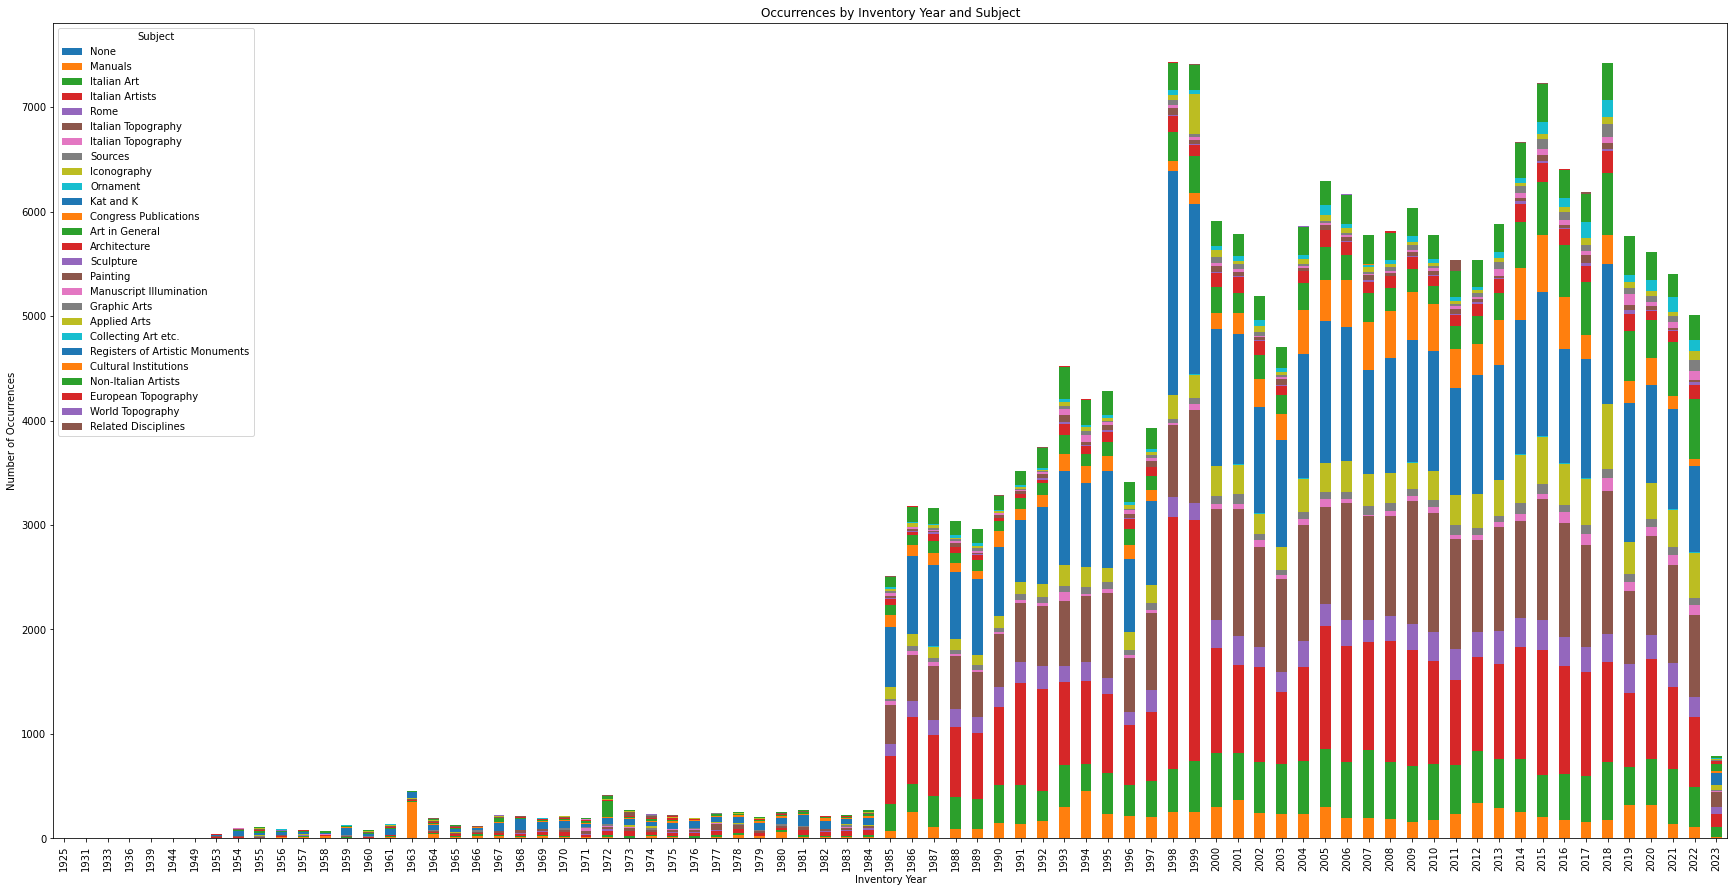

In [56]:
# Group the DataFrame by inventory year and category and count the occurrences
df_freihand['Level1'] = df_freihand.signature.str[0]
year_counts = df_freihand.groupby(['inventory_year', 'Level1']).size().unstack()

# Plot the year_counts as a bar plot
ax = year_counts.plot(kind='bar', stacked=True, figsize=(30, 15))
plt.xlabel('Inventory Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year and Subject')
plt.legend(title='Subject')

# Set the legend labels using the category_dict
handles, labels = ax.get_legend_handles_labels()
new_labels = [subject_dict[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Subject')

# Set the x-tick labels to be integers
ax.set_xticklabels(year_counts.index.astype(int))

plt.show()

# Unreadable signatures 

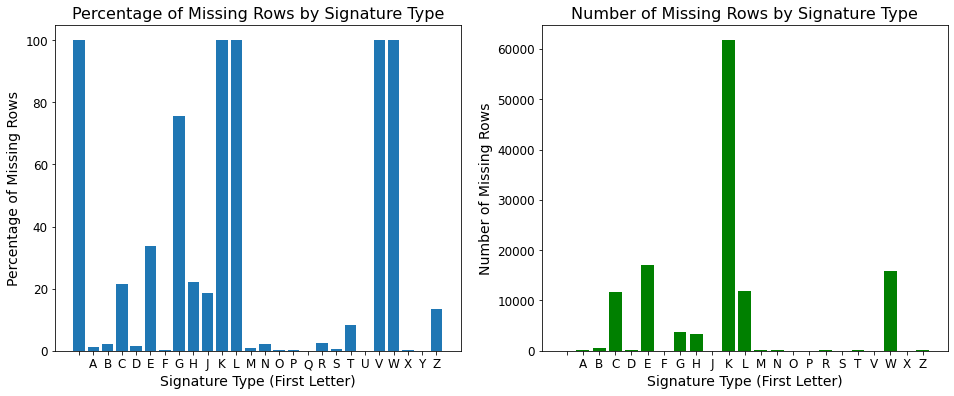

In [38]:
merged_df = df_freihand.merge(df, on='signature', how='left', indicator=True)
missing_rows = merged_df[merged_df['_merge'] == 'left_only']

# Count the number of rows in each group
total_counts = df_freihand.groupby(df_freihand['Level1']).size()
missing_counts = missing_rows.groupby(missing_rows['Level1_x']).size()

missing_percentages = (missing_counts / total_counts) * 100



# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(missing_percentages.index, missing_percentages.values)
ax1.set_title('Percentage of Missing Rows by Signature Type', fontsize=16)
ax1.set_xlabel('Signature Type (First Letter)', fontsize=14)
ax1.set_ylabel('Percentage of Missing Rows', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.bar(missing_counts.index, missing_counts.values, color='green')
ax2.set_title('Number of Missing Rows by Signature Type', fontsize=16)
ax2.set_xlabel('Signature Type (First Letter)', fontsize=14)
ax2.set_ylabel('Number of Missing Rows', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [42]:
missing_counts.sum()

127311